In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/The Josephs/Downloads/mtcars (1).csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df_y=df['mpg']
df_x=df.drop(['mpg','model','vs','am'],axis=1)

In [5]:
df_x.corr() # if there is large correlation it is a good candidate for PCA analysis.
            # may be we will be  able to group many correlated features into one component.

,cyl,disp,hp,drat,wt,qsec,gear,carb
cyl,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.492687,0.526988
disp,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.555569,0.394977
hp,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.125704,0.749812
drat,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.699610,-0.090790
wt,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.583287,0.427606
qsec,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,-0.212682,-0.656249
gear,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,1.000000,0.274073
carb,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,0.274073,1.000000


In [10]:
# Regression model 
import statsmodels.api as sm
xc=sm.add_constant(df_x)
lr=sm.OLS(df_y,xc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     17.60
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.23e-08
Time:                        20:28:29   Log-Likelihood:                -70.968
No. Observations:                  32   AIC:                             159.9
Df Residuals:                      23   BIC:                             173.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8896     17.820      1.004      0.326     -18.974      54.753
cyl           -0.4146      0.958     -0.433      0.669      -2.396       1.566
disp           0.0129      0.018      0.736      0.469      -0.023       0.049
hp            -0.0208      0.021     -1.006      0.325      -0.064       0.022
drat           1.1011      1.598      0.689      0.498      -2.205       4.407
wt            -3.9206      1.862     -2.106      0.046      -7.772      -0.069
qsec           0.5415      0.621      0.872      0.392      -0.744       1.827
gear           1.2332      1.402      0.879      0.388      -1.668       4.134
carb          -0.2551      0.816     -0.313      0.757      -1.942       1.432
==============================================================================
Omnibus:                        4.966   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.898
Skew:                           0.850   Prob(JB):                        0.142
Kurtosis:                       3.184   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# this is calculated for comparison

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif=[vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vif,index=xc.columns,columns=['vif'])

,vif
const,1478.067733
cyl,13.189675
disp,21.402534
hp,9.102122
drat,3.292037
wt,14.962903
qsec,5.556476
gear,4.827297
carb,7.825779


In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

xs=ss.fit_transform(df_x)
xs=pd.DataFrame(xs,columns=df_x.columns)

In [25]:
xs.head() # original data with standardised values

,cyl,disp,hp,drat,wt,qsec,gear,carb
0,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0.430331,0.746967
1,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0.430331,0.746967
2,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,0.430331,-1.140108
3,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,-0.946729,-1.140108
4,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.946729,-0.511083


In [26]:
from sklearn.decomposition import PCA
pca=PCA() # if we dont give component values it will assume the numbers as number of features
pca.fit(xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# evaluation and analysis
# we need to know the eigen values for each of the components which is different
# if we sum up all the eigen values all components it is equal to the number of features because 
#after standardisation variance value of each feature is 1 and the sum gives the number of features. 

In [28]:
pca.explained_variance_ # eigan value of first component is 4.9, and then the values come down , it goes from best to worst
# so we need to decide which component to keep.

array([4.96022693, 2.14728253, 0.49765386, 0.27357005, 0.18043075,
       0.11258685, 0.06174454, 0.02456902])

In [30]:
pca.explained_variance_ratio_

# this ratio says that first component has almost 60% of the variance in the data.
# how? eigen value divided by 8 that is 4.9/8 so on .. 

array([0.60065248, 0.26002249, 0.06026277, 0.03312762, 0.02184904,
       0.01363356, 0.00747688, 0.00297515])

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60065248, 0.86067497, 0.92093775, 0.95406537, 0.9759144 ,
       0.98954797, 0.99702485, 1.        ])

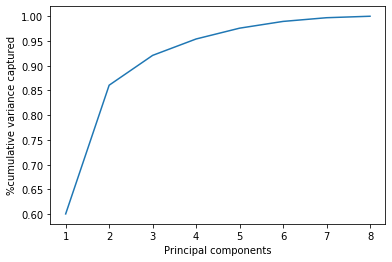

In [34]:
plt.xlabel('Principal components')
plt.ylabel('%cumulative variance captured')
plt.plot(range(1,9),np.cumsum(pca.explained_variance_ratio_))
plt.show()



NOTE:   the figure gives proportion of variance captures by number components, it shows the 
      first 4 components are accounting for 95% of variation in the data, we chose number of               components as 4

In [ ]:
# this says the first component 60% of the variance
# by the time we come to first 6 component it shows 99 % of the data.

In [ ]:
# then how we select which component is better?
# from the explained variance we see that 1st component is 50 % of a feature(variance is 1), therefor go for  all components ,eigen value
# more than 1

### in ML how many components could capture about 95% of variation of the data. in this case 4 components
# capturing 95% of the data.
# in this case we go for 4 components which gives more that 95% of the data.

In [35]:
pca=PCA(n_components=4,whiten=True)#when we create data_pc after converting original 
#data into principal components we want to get a standardised data backed with variance=1,
#if whiten not true we get variance more than 1
pca.fit(xs)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [37]:
# for further analysis we need to convert our original data to 4 principal components.
data_pc=pca.fit_transform(xs)

In [40]:
data_pc.shape # 4 columns are the 4 components. for rest of the analysis we are going to use data_pc (transformed data)
data_pc=pd.DataFrame(data_pc,columns=['pc1','pc2','pc3','pc4'])

Note: after transforming original data into components , we obtain data_pc (shape=32,4).

In [41]:
data_pc.head() 

,pc1,pc2,pc3,pc4
0,0.295328,0.820110,-0.388309,-0.250814
1,0.283841,0.683808,0.087494,-0.170300
2,1.053095,-0.203379,-0.506536,-0.218664
3,0.070655,-1.373808,-0.405105,-0.596401
4,-0.742855,-0.594413,-1.343109,0.288258


In [43]:
pca.components_.shape # 8 number of features, 4 number of components

(4, 8)

In [49]:
pc=pd.DataFrame(pca.components_,columns=df_x.columns).T
pc.columns=['pc1','pc2','pc3','pc4'] # giving column names
pc

,pc1,pc2,pc3,pc4
cyl,-0.439711,0.006493,-0.213894,0.041177
disp,-0.432969,-0.097948,-0.023257,0.341541
hp,-0.401819,0.261415,0.027553,0.069929
drat,0.337419,0.348885,0.112778,0.844803
wt,-0.399860,-0.179106,0.507029,0.193569
qsec,0.252176,-0.478355,0.632540,-0.028712
gear,0.223540,0.555703,0.194703,-0.281562
carb,-0.265389,0.480206,0.495112,-0.213312


Note:  provided above is the loading matrix which give the correlation between each of the
       component and features. it shows that pc1 is highly correlated with cyl , disp ,ho,wt.
       it means in pc1 weigtages of these features are large. the above is called loadings matrix.

In [54]:
data_pc=sm.add_constant(data_pc)
lr=sm.OLS(df_y, data_pc).fit()
lr.summary()

# there is some improvement in adjusted R2
# wt goes into pc1 and pc3 that is why pc1 and pc3 is to an extent significant improvement in the original features.
# the cond.no. for the pc model is 1 compared to the original the collinearity have come down and the components are orthogonal. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     36.95
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.39e-10
Time:                        22:42:25   Log-Likelihood:                -72.494
No. Observations:                  32   AIC:                             155.0
Df Residuals:                      27   BIC:                             162.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0906      0.449     44.776      0.000      19.170      21.011
pc1            5.4699      0.456     11.999      0.000       4.535       6.405
pc2            0.2912      0.456      0.639      0.528      -0.644       1.227
pc3           -0.8414      0.456     -1.846      0.076      -1.777       0.094
pc4           -0.0125      0.456     -0.027      0.978      -0.948       0.923
==============================================================================
Omnibus:                        3.450   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.742
Skew:                           0.716   Prob(JB):                        0.254
Kurtosis:                       2.944   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Recap PCA:
    
    finding numb of components required
    applying that to the model to transform the data to principal components.
    use that pc in our model.
